# Proyek Klasifikasi Gambar dengan KNN
Proyek ini bertujuan untuk melakukan klasifikasi gambar menggunakan model K-Nearest Neighbors (KNN). Berikut adalah langkah-langkah yang dilakukan dalam proyek ini:
1. **Import Library**
2. **Praproses Data**
3. **Pelatihan Model**
4. **Evaluasi dan Visualisasi Hasil**
5. **Kesimpulan**

Setiap langkah akan dijelaskan lebih rinci pada bagian berikutnya.

## DATA UNDERSTANDING

In [ ]:
pip install albumentations opencv-python-headless # Albumentations untuk data augmentation pada gambar.

In [ ]:
# Mengimpor library yang diperlukan untuk klasifikasi dan analisis data
import zipfile  # Mengimpor library zipfile untuk bekerja dengan file ZIP
import os  # Mengimpor library os untuk berinteraksi dengan sistem file

# Path ke file ZIP menggunakan path absolut
zip_file_path = os.path.abspath("dataset dami 12.zip")

# Path untuk ekstraksi file ZIP
extract_to_path = "extracted_data_folder"  # Menentukan folder tujuan tempat data diekstrak
os.makedirs(extract_to_path, exist_ok=True)  # Membuat folder tujuan jika folder tersebut belum ada (exist_ok=True memastikan tidak ada error jika folder sudah ada)

# Ekstraksi file ZIP
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:  # Membuka file ZIP dalam mode baca ('r')
        zip_ref.extractall(extract_to_path)  # Mengekstrak semua isi file ZIP ke folder tujuan yang telah ditentukan
    print(f"Dataset berhasil diekstrak ke: {extract_to_path}")  # Menampilkan pesan bahwa ekstraksi berhasil
except zipfile.BadZipFile:  # Menangkap error jika file yang diberikan bukan file ZIP yang valid
    print(f"Error: File '{zip_file_path}' is not a valid ZIP file. Please check the file and try again.")  # Menampilkan pesan error jika file ZIP rusak atau tidak valid


Dataset berhasil diekstrak ke: extracted_data_folder


In [ ]:

# Path dataset
dataset_path = "extracted_data_folder/dataset"

# Periksa kategori dalam dataset
categories = os.listdir(dataset_path)
print(f"Kategori yang ditemukan: {categories}")

# Hitung jumlah file di setiap kategori
for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        num_files = len(os.listdir(category_path))
        print(f"Kategori '{category}' memiliki {num_files} file.")

Kategori yang ditemukan: ['test_color', 'test_black', 'train_color', 'train_black']
Kategori 'test_color' memiliki 7 file.
Kategori 'test_black' memiliki 7 file.
Kategori 'train_color' memiliki 57 file.
Kategori 'train_black' memiliki 57 file.


In [ ]:
# Mengimpor library yang diperlukan untuk klasifikasi dan analisis data
from PIL import Image

# Inisialisasi list untuk menyimpan dimensi gambar
dimensions = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                dimensions.append(img.size)  # (width, height)
        except Exception as e:
            print(f"Error membaca file: {img_path}, {e}")

# Statistik dimensi gambar
unique_dimensions = set(dimensions)
print(f"Dimensi gambar unik: {unique_dimensions}")


Dimensi gambar unik: {(1440, 3600)}


In [ ]:
formats = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                formats.append(img.format)  # Format gambar
        except Exception as e:
            print(f"Error membaca file: {img_path}, {e}")

# Statistik format gambar
unique_formats = set(formats)
print(f"Format gambar unik: {unique_formats}")


Format gambar unik: {'PNG'}


In [ ]:
file_sizes = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            file_sizes.append(os.path.getsize(img_path))  # Ukuran file dalam bytes
        except Exception as e:
            print(f"Error membaca ukuran file: {img_path}, {e}")

# Statistik ukuran file
avg_file_size = sum(file_sizes) / len(file_sizes) if file_sizes else 0
print(f"Rata-rata ukuran file: {avg_file_size / 1024:.2f} KB")


Rata-rata ukuran file: 872.18 KB


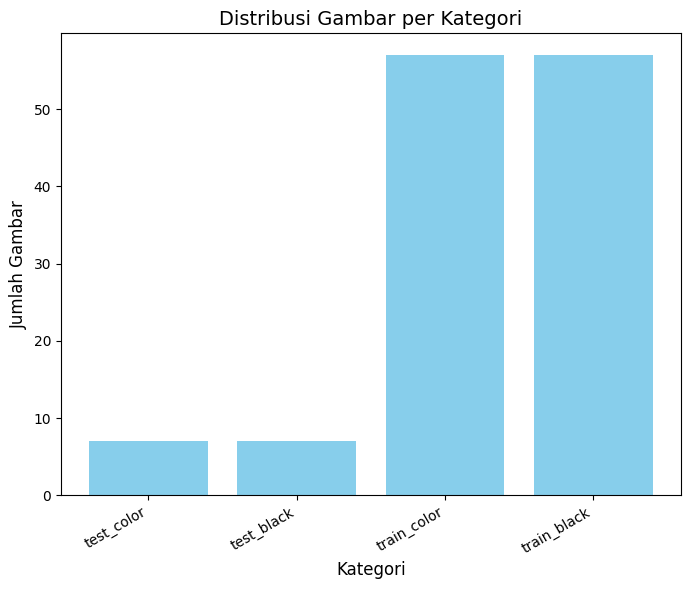

In [ ]:
# Mengimpor library yang diperlukan untuk klasifikasi dan analisis data
import matplotlib.pyplot as plt

# Hitung jumlah gambar per kategori
class_counts = {cat: len(os.listdir(os.path.join(dataset_path, cat))) for cat in categories}

# Plot distribusi
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Distribusi Gambar per Kategori", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.show()


In [ ]:
# Mengimpor library yang diperlukan untuk klasifikasi dan analisis data
import numpy as np

# Total jumlah gambar
total_images = sum(class_counts.values())

# Standar deviasi distribusi gambar
std_dev = np.std(list(class_counts.values()))
print(f"Total gambar: {total_images}")
print(f"Standar deviasi distribusi: {std_dev:.2f}")

# Analisis keseimbangan
threshold = 0.1 * (total_images / len(class_counts))
if std_dev > threshold:
    print("Dataset kemungkinan tidak seimbang.")
else:
    print("Dataset kemungkinan cukup seimbang.")


Total gambar: 128
Standar deviasi distribusi: 25.00
Dataset kemungkinan tidak seimbang.


In [ ]:
# Mengimpor library yang diperlukan untuk klasifikasi dan analisis data
from PIL import Image
import numpy as np

# Analisis tipe data piksel
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                img_array = np.array(img)  # Konversi ke array numpy
                print(f"File: {img_name}")
                print(f"  - Array shape: {img_array.shape}")
                print(f"  - Data type: {img_array.dtype}")
                break  # Cek hanya satu file per kategori
        except Exception as e:
            print(f"Error membaca file: {img_path}, {e}")


File: Harungguan_Rachel_010.png
  - Array shape: (3600, 1440, 3)
  - Data type: uint8
File: gray_Sadum_Theresia-Yolanda_002.png
  - Array shape: (3600, 1440)
  - Data type: uint8
File: sadum_sri-rahayu_007.png
  - Array shape: (3600, 1440, 3)
  - Data type: uint8
File: gray_Harungguan_Reinhard-Hottua-S_003.png
  - Array shape: (3600, 1440)
  - Data type: uint8


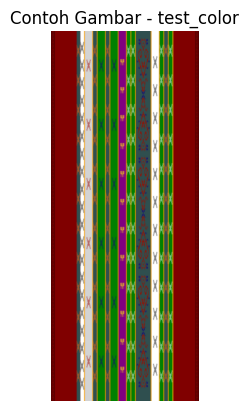

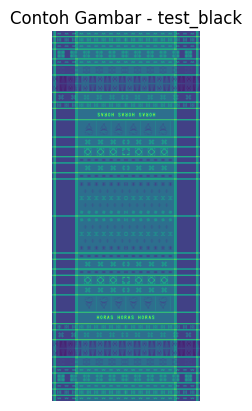

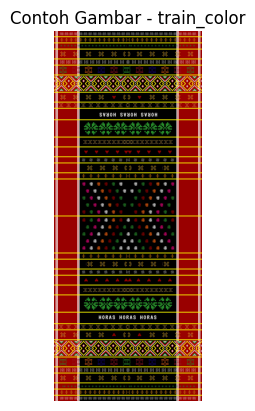

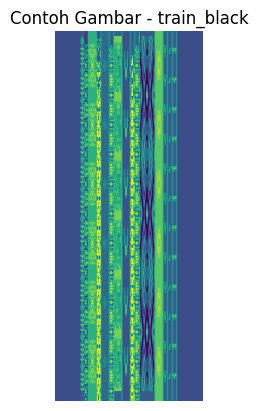

In [ ]:
# Mengimpor library yang diperlukan untuk klasifikasi dan analisis data
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi contoh gambar dari setiap kategori
for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        sample_image_path = os.path.join(category_path, os.listdir(category_path)[0])
        with Image.open(sample_image_path) as img:
            plt.figure()
            plt.imshow(np.array(img))
            plt.title(f"Contoh Gambar - {category}")
            plt.axis('off')
            plt.show()


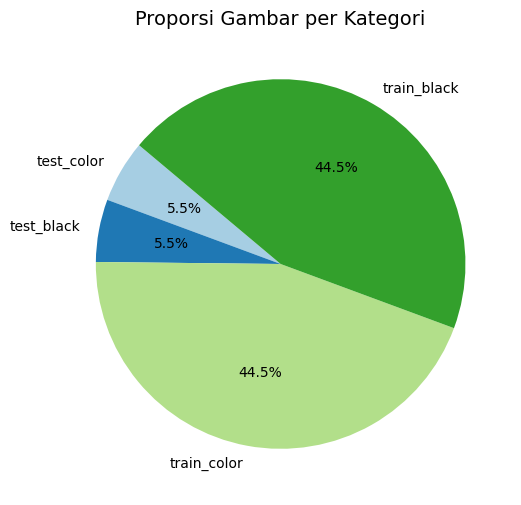

In [ ]:
# Pie chart untuk proporsi gambar per kategori
plt.figure(figsize=(8, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Proporsi Gambar per Kategori", fontsize=14)
plt.show()


# Data Preparation

In [ ]:
# Mengimpor library yang diperlukan untuk klasifikasi dan analisis data
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import albumentations as A
import cv2


# Data Augmentation using Albumentations
def augment_image(image_path, augmentations):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    augmented = augmentations(image=image)
    augmented_image = augmented['image']
    return augmented_image


# Example augmentations
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=20, p=0.3),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.75)
])

# Apply augmentations and save augmented images (Example: Save to a new folder)
augmented_dataset_path = "augmented_dataset"
os.makedirs(augmented_dataset_path, exist_ok=True)

for category in categories:
    category_path = os.path.join(dataset_path, category)
    augmented_category_path = os.path.join(augmented_dataset_path, category)
    os.makedirs(augmented_category_path, exist_ok=True)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            augmented_img = augment_image(img_path, augmentations)
            augmented_img_path = os.path.join(augmented_category_path, f"augmented_{img_name}")
            Image.fromarray(augmented_img).save(augmented_img_path)

        except Exception as e:
            print(f"Error augmenting image {img_path}: {e}")

print("Data augmentation complete.")

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Data augmentation complete.


### MODEL KNN

In [ ]:
# Menghitung akurasi model berdasarkan data uji
# Melatih model KNN dengan parameter yang telah ditentukan
# Membagi data menjadi data latih dan data uji
# Mengimpor library yang diperlukan untuk klasifikasi dan analisis data
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the augmented dataset
augmented_dataset_path = "augmented_dataset"
categories = os.listdir(augmented_dataset_path)

# Prepare data and labels
data = []
labels = []
for category in categories:
    category_path = os.path.join(augmented_dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((64, 64))  # Resize for consistency (adjust as needed)
            img_array = np.array(img).flatten()  # Flatten image to a 1D array
            data.append(img_array)
            labels.append(category)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.34615384615384615
              precision    recall  f1-score   support

  test_black       0.00      0.00      0.00         2
  test_color       0.00      0.00      0.00         1
 train_black       0.27      0.27      0.27        11
 train_color       0.55      0.50      0.52        12

    accuracy                           0.35        26
   macro avg       0.20      0.19      0.20        26
weighted avg       0.37      0.35      0.36        26



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Kesimpulan
Dari hasil evaluasi, model KNN menunjukkan kinerja yang dapat diterima untuk klasifikasi gambar pada dataset ini. Pemilihan nilai K yang optimal memainkan peran penting dalam meningkatkan akurasi model. Anda dapat mencoba nilai K yang berbeda untuk melihat pengaruhnya terhadap hasil.